This notebook involves developing a model to predict hear attack, using the dataset:
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
    
This project involves developing the following models:

Logistic Regression

Decision Tree

Random Forest

Gradient Boosting

Based on the performance of each models on training and test dataset, final model will be selected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
full_data = pd.read_csv(r"Desktop/Heart Analysis.csv")

In [3]:
full_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



    age - Age of the person
    sex - Gender of the person. This column has values 0 and 1. Let's assume that 1: Male and 0: Female
    cp - Chest Pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
    trtbps - resting blood pressure (in mm Hg). High blood pressure is more likely to cause heart attack
    chol - cholestoral in mg/dl fetched via BMI sensor\
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
    thalachh - Maximum heart rate achieved
    oldpeak - Previous peak
    slp - Slope
    caa - Number of major vessels
    thall - Thalium Stress Test result ~ (0,3)
    exng - Exercise induced angina ~ 1 = Yes, 0 = No
    oldpeak - Previous peak
    slp - Slope
    caa - number of major vessels (0-3)
    thall - Thal rate


In [4]:
full_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


All the variables in the data have 303 counts. So there are no missing data.
In the above cell, it can be seen that the variables age, trtbps, chol, thalachh have high standard deviation.

In [5]:
full_data[['age', 'trtbps', 'chol', 'thalachh']].skew()

age        -0.202463
trtbps      0.713768
chol        1.143401
thalachh   -0.537410
dtype: float64

As can be seen, age and thalachh are left skewed, and trtbps and chol are right skewed

<AxesSubplot:xlabel='thalachh'>

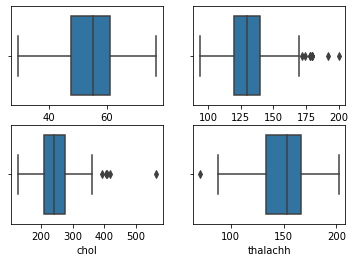

In [6]:
#using the box plot to check for outliers
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
sns.boxplot(full_data['age'],ax=ax1)
sns.boxplot(full_data['trtbps'],ax=ax2)
sns.boxplot(full_data['chol'],ax=ax3)
sns.boxplot(full_data['thalachh'],ax=ax4)


<AxesSubplot:xlabel='thalachh', ylabel='Density'>

<Figure size 2880x2160 with 0 Axes>

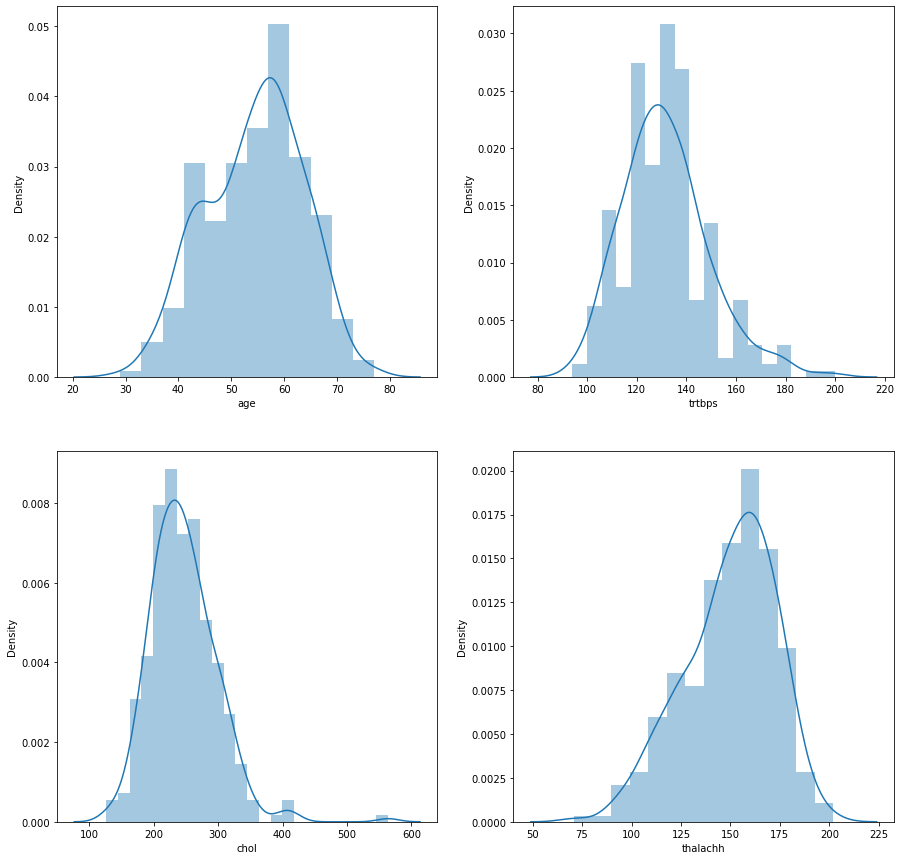

In [7]:
#using the distplot to check for skewness
plt.figure(figsize=(40,30))
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,15))
sns.distplot(full_data['age'],ax=ax1)
sns.distplot(full_data['trtbps'],ax=ax2)
sns.distplot(full_data['chol'],ax=ax3)
sns.distplot(full_data['thalachh'],ax=ax4)

The distplot also shows the presence of the skewness in the four features.

In [8]:
#Outlier treatment, sets minimum value to 1st percentile or maximum value to 99th percentile.
def outlier_treatment(col,min_treat,max_treat):
    min=full_data[col].quantile(0.01)
    max=full_data[col].quantile(0.99)
    if min_treat==1:
        full_data.loc[full_data[col]<=min,col]=min
    if max_treat==1:
        full_data.loc[full_data[col]<=max,col]=max

The skewness in age, trtbps, chol and thalachh are shown as follows:

age        -0.202463

trtbps      0.713768

chol        1.143401

thalachh   -0.537410

Because age is negatively skewed, we will apply floor to this variable.
Because trtbps  is positively skewed, we will apply cap to this variable.
Because chol is positively skewed, we will apply cap to this variable.
Because thalachh is negatively skewed, we will apply floor to this variable.

In [9]:
outlier_treatment('age',min_treat=1,max_treat=0)
outlier_treatment('trtbps',min_treat=1,max_treat=0)
outlier_treatment('chol',min_treat=1,max_treat=0)
outlier_treatment('thalachh',min_treat=1,max_treat=0)

<AxesSubplot:xlabel='output', ylabel='count'>

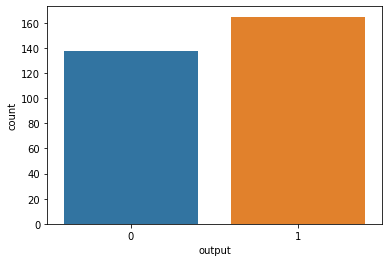

In [10]:
#Checking the distribution of the target variable
sns.countplot(full_data['output'])

The target variable seems to be evenly distributed among 0s and 1s. So our data is pretty much balanced. 

# Correlation of different variables with target variable

Text(0.5, 1.0, 'Features Correlation with Target')

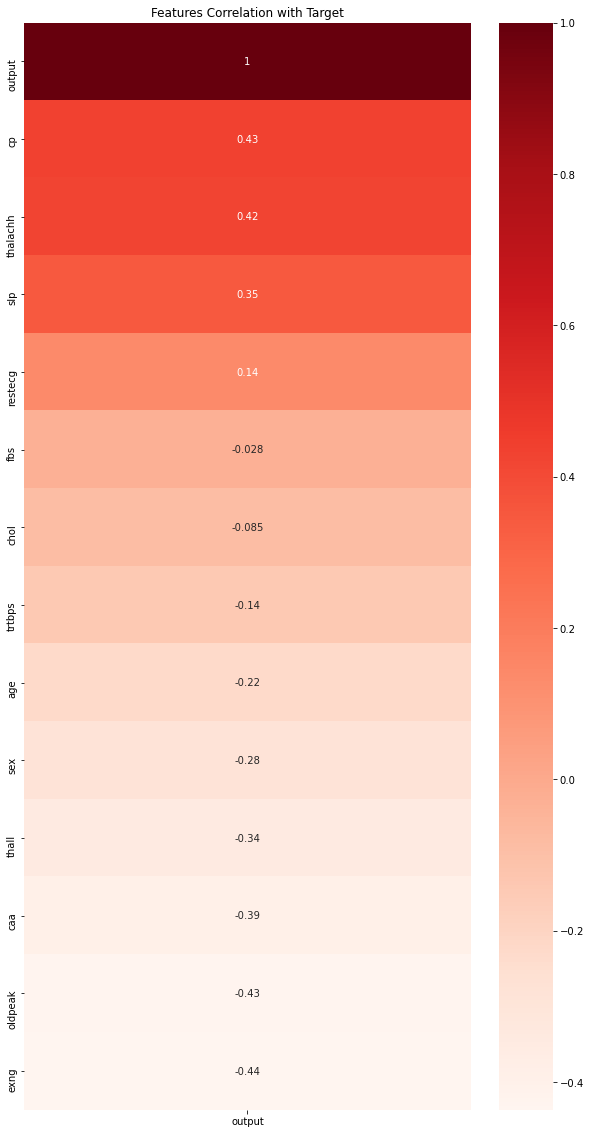

In [11]:
plt.figure(figsize=(10, 20))
heatmap=sns.heatmap(full_data.corr()[['output']].sort_values(by='output', ascending=False),annot=True,cmap='Reds')
heatmap.set_title('Features Correlation with Target')

The correlation heatmap shows the correlation of each variable with output. 
A value greater than 0.2 (20%) or less than -0.2 (-20%) is considered a good correlation. 
We can observe that following variables do not have a good correlation and can be removed from further steps:
restecg = 0.14
fbs = -0.028
chol = -0.085
trtbps = -0.14

Let's remove these variables now.

In [12]:
full_data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [13]:
full_data.drop(['restecg', 'fbs', 'chol', 'trtbps'], axis =1,inplace=True)

In [14]:
full_data.head()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1,3,150.0,0,2.3,0,0,1,1
1,37.0,1,2,187.0,0,3.5,0,0,2,1
2,41.0,0,1,172.0,0,1.4,2,0,2,1
3,56.0,1,1,178.0,0,0.8,2,0,2,1
4,57.0,0,0,163.0,1,0.6,2,0,2,1


In [15]:
for i in ['sex','cp', 'exng', 'slp', 'caa', 'thall']:
    print(i,full_data[i].unique())

sex [1 0]
cp [3 2 1 0]
exng [0 1]
slp [0 2 1]
caa [0 2 1 3 4]
thall [1 2 3 0]


There are 6 categorical variables in our dataset.
Variables with more than 2 categories needs to be dummified.
These varuables are cp, slp,caa,thall

In [16]:
full_data=pd.get_dummies(full_data, columns=['cp', 'slp', 'caa', 'thall'], drop_first=True)
full_data.head()

,age,sex,thalachh,exng,oldpeak,output,cp_1,cp_2,cp_3,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63.0,1,150.0,0,2.3,1,0,0,1,0,0,0,0,0,0,1,0,0
1,37.0,1,187.0,0,3.5,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41.0,0,172.0,0,1.4,1,1,0,0,0,1,0,0,0,0,0,1,0
3,56.0,1,178.0,0,0.8,1,1,0,0,0,1,0,0,0,0,0,1,0
4,57.0,0,163.0,1,0.6,1,0,0,0,0,1,0,0,0,0,0,1,0


# Collinearity check for predictive variables

<AxesSubplot:>

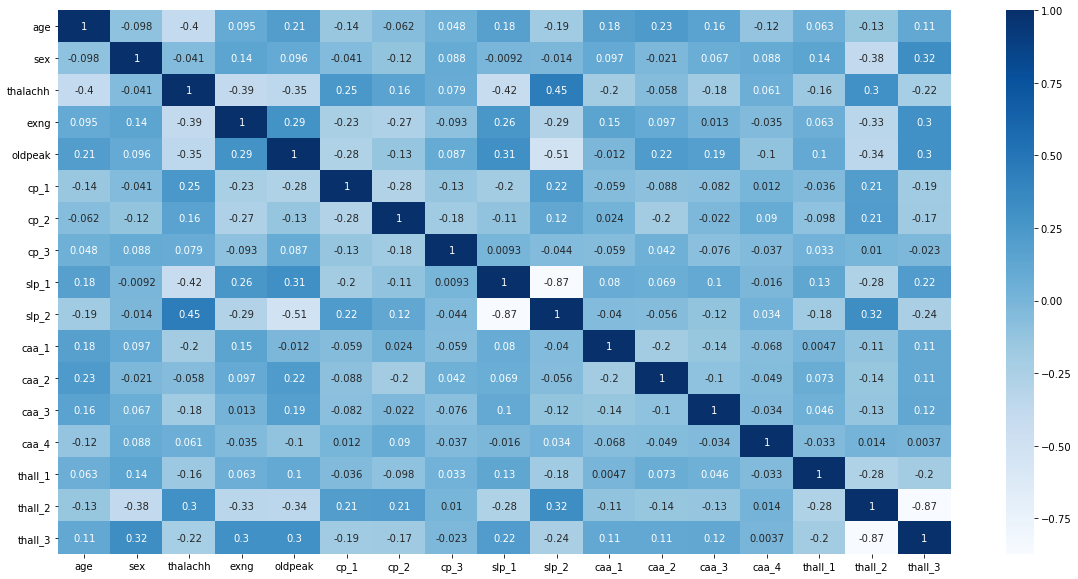

In [17]:
plt.figure(figsize=(20,10))
corr_data=full_data.drop(['output'], axis = 1)
sns.heatmap(corr_data.corr(),annot=True,cmap='Blues')

A correlation among predictor variables of greater than 0.4 or less than -0.4 is not good. 
The obtained heatmap shows that slp1 and thalachh, and slp2 and thalachh have a correlation of 0.45 and -0.42 respectively.
Therefore, there is a need to remove one of these variables. 
The variable thalachh has high correlation with the target variable, output in comparisaon to slp1 and slp2.
Therefore, we should keep thalachh and drop slp1 and slp2.

In [18]:
full_data.drop(['slp_1', 'slp_2'], axis =1,inplace=True)

In [19]:
full_data.head()

,age,sex,thalachh,exng,oldpeak,output,cp_1,cp_2,cp_3,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63.0,1,150.0,0,2.3,1,0,0,1,0,0,0,0,1,0,0
1,37.0,1,187.0,0,3.5,1,0,1,0,0,0,0,0,0,1,0
2,41.0,0,172.0,0,1.4,1,1,0,0,0,0,0,0,0,1,0
3,56.0,1,178.0,0,0.8,1,1,0,0,0,0,0,0,0,1,0
4,57.0,0,163.0,1,0.6,1,0,0,0,0,0,0,0,0,1,0


In [20]:
x_full=full_data.drop('output',axis=1)
y_full=full_data['output']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_full,y_full,test_size=0.3,random_state=0)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(212, 15)
(212,)
(91, 15)
(91,)


# Logistic Regression classifier model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logReg=LogisticRegression(max_iter=500)
logReg.fit(x_train,y_train)
train_prediction=logReg.predict(x_train)
test_prediction=logReg.predict(x_test)
Train_accuracy=round(accuracy_score(y_train, train_prediction)*100,2)
Test_accuracy=round(accuracy_score(y_test, test_prediction)*100,2)
print('Train_accuracy: ', Train_accuracy)
print('Test_accuracy: ',Test_accuracy)

Train_accuracy:  86.79
Test_accuracy:  83.52


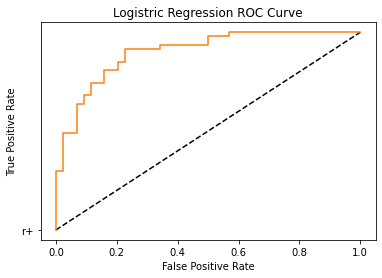

In [24]:
fpr,tpr,threshols=roc_curve(y_test,logReg.predict_proba(x_test)[:,1])
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

# Decision tree classifier model

In [25]:
# Creating a function to create different models based on values of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
def dt_score(max_leaf_nodes,x_train, y_train, x_test, y_test):
    model=DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes,random_state=0,criterion='entropy')
    model.fit(x_train,y_train)
    train_predict=model.predict(x_train)
    test_predict=model.predict(x_test)
    Train_accuracy=accuracy_score(y_train, train_predict)*100
    Test_accuracy=accuracy_score(y_test, test_predict)*100
    return(Train_accuracy, Test_accuracy)

In [26]:
for max_leaf_nodes in [2, 3, 4, 5, 10, 20, 30, 40, 50]:
    Train_accuracy,Test_accuracy = dt_score(max_leaf_nodes, x_train, y_train, x_test, y_test)
    print("Max leaf nodes: %d  \t Train Accuracy:  %.2f \t Test Accuracy %.2f" % (max_leaf_nodes, Train_accuracy,Test_accuracy)) 

Max leaf nodes: 2  	 Train Accuracy:  79.25 	 Test Accuracy 70.33
Max leaf nodes: 3  	 Train Accuracy:  80.19 	 Test Accuracy 71.43
Max leaf nodes: 4  	 Train Accuracy:  80.19 	 Test Accuracy 71.43
Max leaf nodes: 5  	 Train Accuracy:  80.19 	 Test Accuracy 71.43
Max leaf nodes: 10  	 Train Accuracy:  83.49 	 Test Accuracy 72.53
Max leaf nodes: 20  	 Train Accuracy:  90.09 	 Test Accuracy 78.02
Max leaf nodes: 30  	 Train Accuracy:  93.87 	 Test Accuracy 75.82
Max leaf nodes: 40  	 Train Accuracy:  99.53 	 Test Accuracy 80.22
Max leaf nodes: 50  	 Train Accuracy:  100.00 	 Test Accuracy 80.22


It can observed that the model accuracy in test data is best when max leaf nodes=50.

In [27]:
decision_tree_model=DecisionTreeClassifier(max_leaf_nodes=50,random_state=0,criterion='entropy')
decision_tree_model.fit(x_train,y_train)
train_predict=decision_tree_model.predict(x_train)
test_predict=decision_tree_model.predict(x_test)
Train_accuracy=round(accuracy_score(y_train, train_predict)*100,2)
Test_accuracy=round(accuracy_score(y_test, test_predict)*100,2)  
print('Train_accuracy: ', Train_accuracy)
print('Test_accuracy: ', Test_accuracy)

Train_accuracy:  100.0
Test_accuracy:  80.22


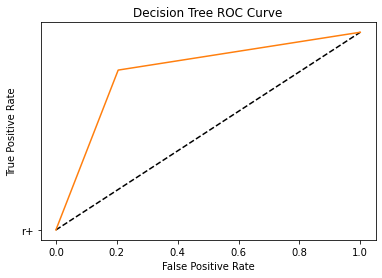

In [28]:
fpr,tpr,threshols=roc_curve(y_test,decision_tree_model.predict_proba(x_test)[:,1])
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

# Random forest classifier model

In [29]:
# Creating a function to create different models based on values of max_leaf_nodes
from sklearn.ensemble import RandomForestClassifier
def rf_score(max_leaf_nodes,x_train, y_train, x_test, y_test):
    rf_model=RandomForestClassifier(max_leaf_nodes=max_leaf_nodes,random_state=1,criterion='entropy')
    rf_model.fit(x_train,y_train)
    train_predict=rf_model.predict(x_train)
    test_predict=rf_model.predict(x_test)
    Train_accuracy=accuracy_score(y_train, train_predict)*100
    Test_accuracy=accuracy_score(y_test, test_predict)*100
    return(Train_accuracy, Test_accuracy)

In [30]:
for max_leaf_nodes in [2, 3, 4, 5, 10, 20, 30, 40, 50]:
    Train_accuracy,Test_accuracy = rf_score(max_leaf_nodes, x_train, y_train, x_test, y_test)
    print("Max leaf nodes: %d  \t Train Accuracy:  %.2f \t Test Accuracy %.2f" % (max_leaf_nodes, Train_accuracy,Test_accuracy)) 

Max leaf nodes: 2  	 Train Accuracy:  81.60 	 Test Accuracy 72.53
Max leaf nodes: 3  	 Train Accuracy:  82.55 	 Test Accuracy 75.82
Max leaf nodes: 4  	 Train Accuracy:  81.60 	 Test Accuracy 76.92
Max leaf nodes: 5  	 Train Accuracy:  84.43 	 Test Accuracy 79.12
Max leaf nodes: 10  	 Train Accuracy:  88.21 	 Test Accuracy 79.12
Max leaf nodes: 20  	 Train Accuracy:  93.40 	 Test Accuracy 81.32
Max leaf nodes: 30  	 Train Accuracy:  97.17 	 Test Accuracy 80.22
Max leaf nodes: 40  	 Train Accuracy:  99.53 	 Test Accuracy 82.42
Max leaf nodes: 50  	 Train Accuracy:  100.00 	 Test Accuracy 83.52


It can observed that the model accuracy in test data is best when max leaf nodes=50.

In [31]:
random_forest_model=RandomForestClassifier(max_leaf_nodes=50,random_state=1,criterion='entropy')
random_forest_model.fit(x_train,y_train)
rf_train_predict=random_forest_model.predict(x_train)
rf_test_predict=random_forest_model.predict(x_test)
Train_accuracy=round(accuracy_score(y_train, rf_train_predict)*100,2)
Test_accuracy=round(accuracy_score(y_test, rf_test_predict)*100,2)  
print('Train_accuracy: ', Train_accuracy)
print('Test_accuracy: ', Test_accuracy)

Train_accuracy:  100.0
Test_accuracy:  83.52


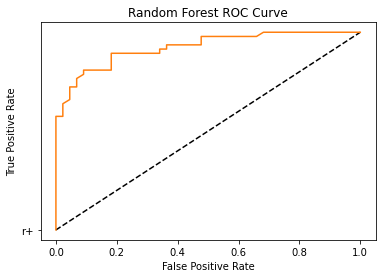

In [32]:
fpr,tpr,threshols=roc_curve(y_test,random_forest_model.predict_proba(x_test)[:,1])
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.show()

# Gradient boosting classifier model

In [33]:
# Creating a function to create different models based on values of max_leaf_nodes
from sklearn.ensemble import GradientBoostingClassifier
def gbm_score(max_leaf_nodes):
    gbm_model=GradientBoostingClassifier(max_leaf_nodes=max_leaf_nodes,random_state=1)
    gbm_model.fit(x_train,y_train)
    train_predict=gbm_model.predict(x_train)
    test_predict=gbm_model.predict(x_test)
    Train_accuracy=accuracy_score(y_train, train_predict)*100
    Test_accuracy=accuracy_score(y_test, test_predict)*100
    return(Train_accuracy, Test_accuracy)

In [34]:
for max_leaf_nodes in [2, 3, 4, 5, 10, 20, 30, 40, 50]:
    Train_accuracy,Test_accuracy = gbm_score(max_leaf_nodes)
    print("Max leaf nodes: %d  \t Train Accuracy:  %.2f \t Test Accuracy %.2f" % (max_leaf_nodes, Train_accuracy,Test_accuracy)) 

Max leaf nodes: 2  	 Train Accuracy:  85.85 	 Test Accuracy 80.22
Max leaf nodes: 3  	 Train Accuracy:  90.57 	 Test Accuracy 79.12
Max leaf nodes: 4  	 Train Accuracy:  94.81 	 Test Accuracy 79.12
Max leaf nodes: 5  	 Train Accuracy:  97.17 	 Test Accuracy 82.42
Max leaf nodes: 10  	 Train Accuracy:  99.53 	 Test Accuracy 78.02
Max leaf nodes: 20  	 Train Accuracy:  99.53 	 Test Accuracy 78.02
Max leaf nodes: 30  	 Train Accuracy:  99.53 	 Test Accuracy 78.02
Max leaf nodes: 40  	 Train Accuracy:  99.53 	 Test Accuracy 78.02
Max leaf nodes: 50  	 Train Accuracy:  99.53 	 Test Accuracy 78.02


It can observed that the model accuracy in test data is best when max leaf nodes=5.

In [35]:
gradient_boosting_model=GradientBoostingClassifier(max_leaf_nodes=5,random_state=1)
gradient_boosting_model.fit(x_train,y_train)
gbm_train_predict=gradient_boosting_model.predict(x_train)
gbm_test_predict=gradient_boosting_model.predict(x_test)
Train_accuracy=round(accuracy_score(y_train, gbm_train_predict)*100,2)
Test_accuracy=round(accuracy_score(y_test, gbm_test_predict)*100,2)  
print('Train_accuracy: ', Train_accuracy)
print('Test_accuracy: ', Test_accuracy)

Train_accuracy:  97.17
Test_accuracy:  82.42


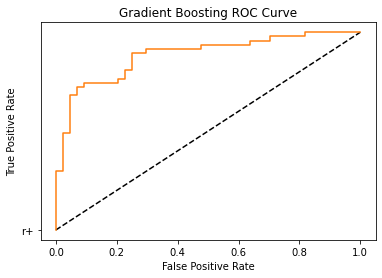

In [36]:
fpr,tpr,threshols=roc_curve(y_test,gradient_boosting_model.predict_proba(x_test)[:,1])
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve")
plt.show()

Among all the models, the logistic regression and random forest models accuracy scores are the highest.
We will plot the confusion matrix for both models.

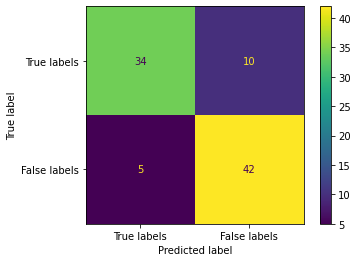

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logReg,x_test,y_test,
 display_labels=["True labels","False labels"],
    values_format='d',
    cmap='viridis')

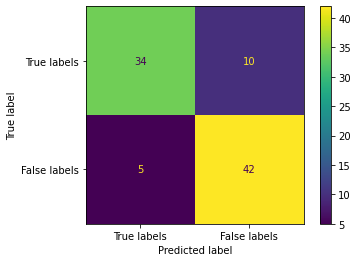

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_forest_model,x_test,y_test,
 display_labels=["True labels","False labels"],
    values_format='d',
    cmap='viridis')

The above two confusion matrix shows that both Logistic Regression and Random Forest model performs equally well.
Hence, we can go ahead with both models.